In [1]:
import pandas as pd
import numpy as np

In [2]:
wheat=pd.read_csv('lehfwheat.csv')

In [3]:
print(wheat)

     OBS  LOGPRICE  LOGWHEAT  WHEAT  PRICE  Unnamed: 5
0   1888  2.379546  1.327075   3.77  10.80         NaN
1   1889  2.351375  1.244155   3.47  10.50         NaN
2   1890  2.533697  1.275363   3.58  12.60         NaN
3   1891  2.415914  1.324419   3.76  11.20         NaN
4   1892  2.261763  1.319086   3.74   9.60         NaN
5   1893  2.128232  1.313724   3.72   8.40         NaN
6   1894  2.163323  1.316408   3.73   8.70         NaN
7   1895  2.297573  1.223775   3.40   9.95         NaN
8   1896  2.476538  1.178655   3.25  11.90         NaN
9   1897  2.497329  1.115142   3.05  12.15         NaN
10  1898  2.288486  1.340250   3.82   9.86         NaN
11  1899  2.285439  1.208960   3.35   9.83         NaN
12  1900  2.244956  1.199965   3.32   9.44         NaN
13  1901  2.248129  1.223775   3.40   9.47         NaN
14  1902  2.273156  1.332366   3.79   9.71         NaN
15  1903  2.285439  1.340250   3.82   9.83         NaN
16  1904  2.285439  1.286474   3.62   9.83         NaN
17  1905  

In [4]:
wheat.index

RangeIndex(start=0, stop=24, step=1)

In [5]:
wheat.columns

Index(['OBS', 'LOGPRICE', 'LOGWHEAT', 'WHEAT', 'PRICE', 'Unnamed: 5'], dtype='object')

In [6]:
wheat.tail()

,OBS,LOGPRICE,LOGWHEAT,WHEAT,PRICE,Unnamed: 5
19,1907,2.394252,1.205971,3.34,10.96,NaN
20,1908,2.485740,1.205971,3.34,12.01,NaN
21,1909,2.374906,1.316408,3.73,10.75,NaN
22,1910,2.292535,1.302913,3.68,9.90,NaN
23,1911,2.334084,1.258461,3.52,10.32,NaN


In [7]:
wheat.describe()

,OBS,LOGPRICE,LOGWHEAT,WHEAT,PRICE,Unnamed: 5
count,24.000000,24.000000,24.000000,24.000000,24.000000,0.0
mean,1899.500000,2.327889,1.270404,3.568750,10.307917,NaN
std,7.071068,0.101887,0.061954,0.216158,1.067423,NaN
min,1888.000000,2.128232,1.115142,3.050000,8.400000,NaN
25%,1893.750000,2.270308,1.220072,3.387500,9.682500,NaN
50%,1899.500000,2.295054,1.294693,3.650000,9.925000,NaN
75%,1905.250000,2.383223,1.317078,3.732500,10.840000,NaN
max,1911.000000,2.533697,1.340250,3.820000,12.600000,NaN


In [8]:
wheat.loc[20,'OBS']

1908

In [9]:
wheat.iloc[20,0]

1908

In [10]:
wheat.loc[:,'OBS']

0     1888
1     1889
2     1890
3     1891
4     1892
5     1893
6     1894
7     1895
8     1896
9     1897
10    1898
11    1899
12    1900
13    1901
14    1902
15    1903
16    1904
17    1905
18    1906
19    1907
20    1908
21    1909
22    1910
23    1911
Name: OBS, dtype: int64

In [11]:
wheat.iloc[20,:-1]

OBS         1908.000000
LOGPRICE       2.485740
LOGWHEAT       1.205971
WHEAT          3.340000
PRICE         12.010000
Name: 20, dtype: float64

In [12]:
wheat.drop(columns=['Unnamed: 5'], inplace=True)

In [13]:
list(wheat.columns)

['OBS', 'LOGPRICE', 'LOGWHEAT', 'WHEAT', 'PRICE']

In [14]:
new_cols=[x.lower() for x in list(wheat.columns)]
new_cols[0]='year'

In [15]:
wheat.columns=new_cols
wheat.columns

Index(['year', 'logprice', 'logwheat', 'wheat', 'price'], dtype='object')

In [16]:
wheat.set_index('year', inplace=True)
wheat.head()

,logprice,logwheat,wheat,price
year,,,,
1888,2.379546,1.327075,3.77,10.8
1889,2.351375,1.244155,3.47,10.5
1890,2.533697,1.275363,3.58,12.6
1891,2.415914,1.324419,3.76,11.2
1892,2.261763,1.319086,3.74,9.6


In [17]:
wheat.plot()

In [18]:
y2_wheat=wheat['wheat']
y1_wheat=wheat['wheat'].shift(1)
pct_chg_wheat=1-(y2_wheat/y1_wheat)

In [19]:
wheat['pct_chg_wheat']=1-(y2_wheat/y1_wheat)

In [20]:
wheat['log_pct_chg_wheat']=(-1)*np.sign(wheat['pct_chg_wheat'])*np.log(np.abs(wheat['pct_chg_wheat']))

/home/bob/anaconda3/envs/py_env_1/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [21]:
wheat.head()

,logprice,logwheat,wheat,price,pct_chg_wheat,log_pct_chg_wheat
year,,,,,,
1888,2.379546,1.327075,3.77,10.8,NaN,NaN
1889,2.351375,1.244155,3.47,10.5,0.079576,2.531048
1890,2.533697,1.275363,3.58,12.6,-0.031700,-3.451430
1891,2.415914,1.324419,3.76,11.2,-0.050279,-2.990161
1892,2.261763,1.319086,3.74,9.6,0.005319,5.236442


In [22]:
y2_price=wheat['price']
y1_price=wheat['price'].shift(1)
wheat['pct_chg_price']=1-(y2_price/y1_price)
wheat['log_pct_chg_price']=(-1)*np.sign(wheat['pct_chg_price'])*np.log(np.abs(wheat['pct_chg_price']))

/home/bob/anaconda3/envs/py_env_1/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [23]:
wheat.head()

,logprice,logwheat,wheat,price,pct_chg_wheat,log_pct_chg_wheat,pct_chg_price,log_pct_chg_price
year,,,,,,,,
1888,2.379546,1.327075,3.77,10.8,NaN,NaN,NaN,NaN
1889,2.351375,1.244155,3.47,10.5,0.079576,2.531048,0.027778,3.583519
1890,2.533697,1.275363,3.58,12.6,-0.031700,-3.451430,-0.200000,-1.609438
1891,2.415914,1.324419,3.76,11.2,-0.050279,-2.990161,0.111111,2.197225
1892,2.261763,1.319086,3.74,9.6,0.005319,5.236442,0.142857,1.945910


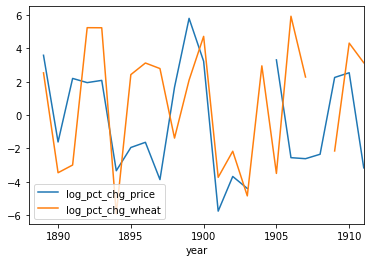

In [24]:
wheat[['log_pct_chg_price','log_pct_chg_wheat']].plot()

In [50]:
wheat['ma5'] = wheat['price'].rolling(5).mean()

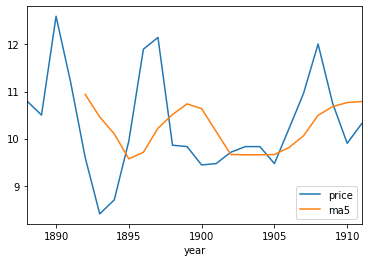

In [51]:
wheat[['price','ma5']].plot()

In [28]:
wheat.head()
data=wheat[['logprice', 'logwheat', 'wheat', 'price']]
data.to_csv('wheat.csv')